# Coding Example
---
![MNIST numbers](https://cdn-images-1.medium.com/max/1600/0*a0ejNYv_LCRP-E2t)
This notebook serves to give you a taste of Machine Learning and the process one might go through to obtain a model with acceptable performance. 

The following example is the "Hello World" of ML. If you've ever come across an ML tutorial, this would most probably be one of the first things covered.

It such a popular example since it can be as simple or complex as desired, touches on complex topics intuitively and has a high accuracy (unlike most real world applications of ML)

We will be using python and a number of libraries. Please save any questions, write them down and we can dress them at the end.

In [1]:
# Get the dataset for all the hand written numbers - already labelled!
from keras.datasets import mnist

Using TensorFlow backend.


![ease of python](https://imgs.xkcd.com/comics/python.png)

## Good ol' fashioned way
---
We start with programming the "math" of a basic ML technique called k-Nearest Neighbor. In reality, we don't program such low level code - there are libraries that do it for you and most of the time do it better than you would ever be able to do it.

In [3]:
# numpy is like matlab or R in python (very rough statement)
import numpy as np

# The difference between two images can be found in many different ways, this is one of the more palatable
def euclidean_distance(img_a, img_b):
    '''Takes 2 matricies and does an element-wise operation to find the distance between 2 images: img_a, img_b'''
    # element-wise computations are automatically handled by numpy
    return sum((img_a - img_b) ** 2)

In [4]:
# A high performance container that is never empty
from collections import defaultdict

# Once all distances has been found, using a 'voting' system, we look for which category a picture falls
# into by looking at a certain number of neighbours
def find_majority(labels):
    '''Finds the majority class/label out of the given labels. I.e. if there are more "1's" around the test
       data point then it must be a 1.'''
    
    # defaultdict(type) is to automatically add new keys without throwing error.
    counter = defaultdict(int)
    for label in labels:
        counter[label] += 1

    # Finding the majority class.
    majority_count = max(counter.values())
    for key, value in counter.items():
        if value == majority_count:
            return key

In [5]:
# Setting up dataset as numpy array for faster mathematical operations. The mnist object contains operations which
# does this all for you
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print("Shape of the (test) images: {}". format(test_images.shape))
print("Shape of the (test) labels: {}". format(test_labels.shape))

Shape of the (test) images: (10000, 28, 28)
Shape of the (test) labels: (10000,)


In [7]:
# Currently the images are stores in an np.array of 28 np.arrays that each contain 28 numbers (for each pixel)
# We need to flatten them into single np.arrays
image_vector_size = 28*28
train_images = train_images.reshape(train_images.shape[0], image_vector_size)
test_images = test_images.reshape(test_images.shape[0], image_vector_size)

In [8]:
print("Shape of the (test) images: {}". format(test_images.shape))
print("Shape of the (test) labels: {}". format(test_labels.shape))

Shape of the (test) images: (10000, 784)
Shape of the (test) labels: (10000,)


In [9]:
from operator import itemgetter

# Using the two functions defined above, we can predict the category of a test image/matrix
def predict(k, train_images, train_labels, test_images):
    '''
    Predicts the new data-point's category/label by 
    looking at all other training labels
    '''
    # distances contains tuples of (distance, label)
    distances = [(euclidean_distance(test_image, image), label)
                    for (image, label) in zip(train_images, train_labels)]
    # sort the distances list by distances
    by_distances = sorted(distances, key=lambda x : x[0])
    # extract only k closest labels
    k_labels = [label for (_, label) in by_distances[:k]]
    # return the majority voted label
    return find_majority(k_labels)

In [10]:
%%time
# Now run the model, choosing a k of 10 (looking at 10 neighbours)
# We will only look at the first 100 images since it takes too long to run on more
i = 0
total_correct = 0
for test_image in test_images:
    pred = predict(10, train_images, train_labels, test_image)
    if pred == test_labels[i]:
        total_correct += 1
    acc = (total_correct / (i+1)) * 100
    if i%10 == 0:
        print('test image['+str(i)+']', '\tpred:', pred, '\torig:', test_labels[i], '\tacc:', str(round(acc, 2))+'%')
    if i > 100:
        break
    i += 1

test image[0] 	pred: 7 	orig: 7 	acc: 100.0%
test image[10] 	pred: 4 	orig: 0 	acc: 36.36%
test image[20] 	pred: 7 	orig: 9 	acc: 33.33%
test image[30] 	pred: 1 	orig: 3 	acc: 29.03%


KeyboardInterrupt: 

This model achieves and accuracy of 32% - approx. 1/3 predictions are correct. Which is much higher than a random number generator of 1/10 (for the 10 labels). And it took 10 minutes to run just 100 images.

However, we can do much better. Let's try a shallow Neural Net, more properly known as a multi-layer perceptron (MLP) model, and look at the power of Keras!

In [11]:
import keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [12]:
# When dealing with multiple categories and MLPs it is best practice to convert the label vector to a matrix of
# 0s and 1s with as many features as there are unique labels. This process is called one-hot-encoding

# The one-hot-encoding of [5, 0, 4, 1, 9] is
# [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
#  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
#  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
#  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
#   0, 1, 2, 3, 4, 5, 6, 7, 8, 9 <- added for reference, not really there

# keras makes our life easy here
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [13]:
from keras.layers import Dense # Dense layers are "fully connected" layers (will make more sense when we look at CNNs)
from keras.models import Sequential # A model that doesn't include inception (don't need to worry about this)

image_size = 784 # 28*28

# Create a blank canvas for us to create a model on
model = Sequential() 

# The input layer requires the special input_shape parameter which should match the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


![neural net axample](https://cdn-images-1.medium.com/max/1600/1*XdCMCaHPt-pqtEibUfAnNw.png)

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

Instructions for updating:
Use tf.cast instead.


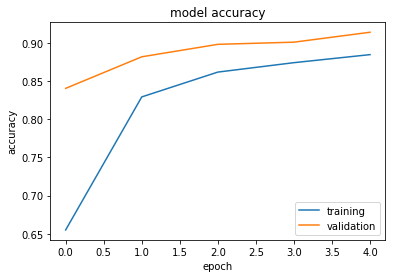

Test loss: 0.461
Test accuracy: 0.895
CPU times: user 4.66 s, sys: 950 ms, total: 5.61 s
Wall time: 2.26 s


In [15]:
%%time
# We have our model on our canvas, let's compile it, train it and test it
# Don't worry about the parameters but we can discuss them later if you would like
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

An MLP has bumped the accuracy up from 3/10 to 9/10! This is a great indicator of the power of Neural Networks. Plus, this all ran in 2.47s and it ran on theentire data set!

To take things one step further, especially with image recognition, we will look at Convolutional Neural Networks

![CNN](https://cdn-images-1.medium.com/max/1600/1*V7YGj0ZWil9V-i0k74QVSQ.png)

In [16]:
# Get the data (again)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [17]:
# Importing the required Keras modules containing model and layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


![CNN Overview](https://cdn-images-1.medium.com/max/1600/1*5A4b1qOZIr4Q6SKceqGn7w.jpeg)

In [18]:
%%time
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.2216 - acc: 0.9335
Epoch 2/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0906 - acc: 0.9725
Epoch 3/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.0639 - acc: 0.9804
Epoch 4/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0471 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0396 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0323 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.0270 - acc: 0.9907
Epoch 8/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0237 - acc: 0.9919
Epoch 9/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0210 - acc: 0.9929
Epoch 10/10
60000/60000 [==============================] - 16s 267us/step - loss: 

In [19]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 58us/step


[0.06681454011008536, 0.984]

98.52%

As good, if not better than humans. As an exercise we could go through the ones it predicts wrong ...

In [20]:
incorrects = np.nonzero(model.predict_classes(x_test).reshape((-1,)) != y_test)
values = model.predict_classes(x_test, verbose=1)

10000/10000 [==============================] - 0s 43us/step


In [21]:
incorrects

(array([  18,   92,  149,  290,  321,  340,  445,  448,  449,  495,  543,
         582,  646,  691,  740,  846,  882,  883,  947,  965, 1014, 1039,
        1181, 1226, 1232, 1247, 1260, 1319, 1378, 1393, 1394, 1425, 1522,
        1530, 1611, 1621, 1678, 1681, 1709, 1717, 1790, 1878, 1901, 1955,
        2040, 2044, 2070, 2098, 2118, 2130, 2182, 2189, 2224, 2272, 2280,
        2293, 2414, 2437, 2462, 2488, 2597, 2654, 2720, 2730, 2760, 2896,
        2921, 2939, 2953, 2995, 3060, 3073, 3225, 3289, 3448, 3475, 3520,
        3558, 3559, 3580, 3626, 3662, 3727, 3751, 3762, 3778, 3780, 3853,
        3869, 3902, 3906, 4027, 4075, 4078, 4123, 4156, 4163, 4176, 4199,
        4248, 4294, 4360, 4382, 4477, 4497, 4578, 4601, 4639, 4761, 4807,
        4823, 4880, 4956, 5067, 5331, 5642, 5734, 5887, 5936, 5955, 5973,
        6011, 6023, 6059, 6091, 6112, 6157, 6166, 6172, 6555, 6574, 6576,
        6597, 6603, 6625, 6651, 6755, 6783, 6847, 7216, 7797, 7849, 7858,
        8059, 8094, 8246, 8325, 9009, 

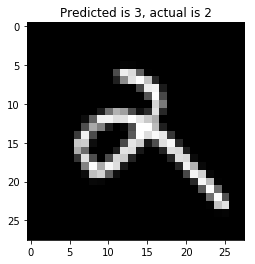

In [24]:
ind = 149

pixels = x_test[ind]
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Predicted is {}, actual is {}'.format(values[ind], y_test[ind]))
plt.imshow(pixels, cmap='gray')
plt.show()